# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.patches as mpatches    
import warnings
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

seed = 0

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from tqdm import tqdm

In [3]:
df= pd.read_excel("Data.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Splitting

In [6]:
from sklearn.model_selection import train_test_split 
seed = 0
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Response']), df['Response'], test_size=test_size, random_state=seed, stratify = df['Response'])



In [7]:
df = pd.concat([x_train,y_train], axis = 1)

# export to csv test partition

df_test = pd.concat([x_test, y_test], axis = 1)
df_test.to_excel("df_TEST.xlsx")

print('Train Nr. obs:\t{}\t==> {:.2%} of Data'.format(df.shape[0],df.shape[0]/2240))
print('Test Nr. obs:\t{}\t==> {:.2%} of Data'.format(df_test.shape[0],df_test.shape[0]/2240))

Train Nr. obs:	1792	==> 80.00% of Data
Test Nr. obs:	448	==> 20.00% of Data


In [8]:
# Data in right Format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# test

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

In [9]:
display(df.head(3))
print(df.info(), "\nResponse rate: {}%".format(round(100*df["Response"].mean(), 2)))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1037,67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,...,7,0,0,0,0,0,0,3,11,0
1729,3828,1951,Graduation,Married,71107.0,0,1,2013-02-17,61,533,...,4,0,0,0,0,0,0,3,11,0
1597,3409,1984,Graduation,Single,36108.0,1,0,2013-10-15,68,141,...,9,1,0,0,0,0,0,3,11,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 1037 to 130
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1792 non-null   int64         
 1   Year_Birth           1792 non-null   int64         
 2   Education            1792 non-null   object        
 3   Marital_Status       1792 non-null   object        
 4   Income               1772 non-null   float64       
 5   Kidhome              1792 non-null   int64         
 6   Teenhome             1792 non-null   int64         
 7   Dt_Customer          1792 non-null   datetime64[ns]
 8   Recency              1792 non-null   int64         
 9   MntWines             1792 non-null   int64         
 10  MntFruits            1792 non-null   int64         
 11  MntMeatProducts      1792 non-null   int64         
 12  MntFishProducts      1792 non-null   int64         
 13  MntSweetProducts     1792 non-n

In [10]:
# Get dataset size saved

df_original_size = len(df)
print (">>>",df_original_size,"Observations")

>>> 1792 Observations


In [11]:
# function that returns number of missings, percentage of missings and if it is above or below 3% threshold

def missing_values_reporter(df):    
    na_count = df.isna().sum() 
    ser = na_count[na_count > 0]
    ser_p = np.round(ser.divide(df.shape[0])*100,2)
    tmp = pd.DataFrame({"N missings": ser,"% missings": ser_p,"Above Threshold (3%)": False})
    tmp.loc[tmp["% missings"] > 3., 'Above Threshold (3%)'] = 'True' 
    return tmp

In [12]:
df_miss=missing_values_reporter(df)
df_miss

,N missings,% missings,Above Threshold (3%)
Income,20,1.12,False


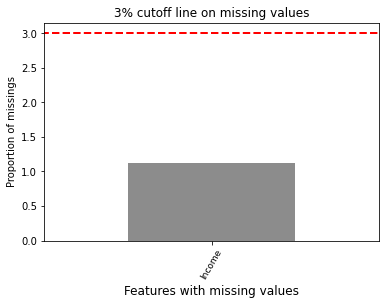

In [13]:
# cutoff is in percentage

cutoff_ = 3

cutoff_list = [cutoff_, cutoff_]
#plt.figure(figsize=(15,5))
ax = df_miss.sort_values('% missings', ascending=False).plot.bar(y="% missings", 
                                                                 color="Grey",
                                                                 alpha = 0.9,
                                                                 title="{}% cutoff line on missing values".format(cutoff_),
                                                                 legend=False)
ax.set_xlabel("Features with missing values", size=12)
ax.set_ylabel("Proportion of missings")
ax.plot([-1, len(df_miss.index)], cutoff_list,'r--', lw=2)
ax.set_xticklabels(df_miss.index, rotation=60, size=9)
plt.show()

In [14]:
# delete missing values (automate process..)

df.dropna(inplace=True)

# test
df_test.dropna(inplace=True)

In [15]:
df.shape

(1772, 29)

In [16]:
#Describe Ctegorical feature

In [17]:
df.describe(include=["object", "category"])

,Education,Marital_Status
count,1772,1772
unique,5,8
top,Graduation,Married
freq,895,686


In [18]:
def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

In [19]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      895  0.140782
               Master          296  0.155405
               PhD             381  0.202100
Marital_Status Absurd            2  0.500000
               Alone             2  0.500000
               Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273
               YOLO              2  0.500000

In [20]:
# remove unwanted categories

education_cat = ['2n Cycle','Basic','Graduation','Master','PhD']
marital_cat = ['Divorced','Divorced','Married','Single','Together','Widow']

df = df[df['Education'].isin(education_cat)]
df = df[df['Marital_Status'].isin(marital_cat)]

In [21]:
df_cat=describe_cat(df, df.select_dtypes(include=["object", "category"]).columns, "Response")
df_cat

Response          
                             count      mean
Education      2n Cycle        152  0.098684
               Basic            48  0.041667
               Graduation      894  0.139821
               Master          294  0.156463
               PhD             378  0.198413
Marital_Status Divorced        183  0.224044
               Married         686  0.102041
               Single          377  0.230769
               Together        454  0.110132
               Widow            66  0.227273

In [22]:
import matplotlib.ticker as mtick
def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        color_t = ['grey' if x > cutoff_ else 'lightgrey' for x in df_cat]
        plt.figure(figsize=(15,5))
        ax = df_cat.plot.bar(color=color_t,
                             alpha = 0.9,
                             title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)),
                             legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2.5, color='firebrick')
        plt.show()

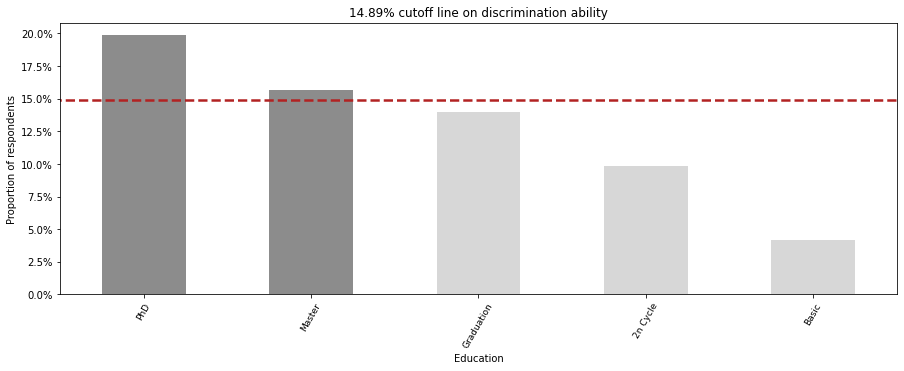

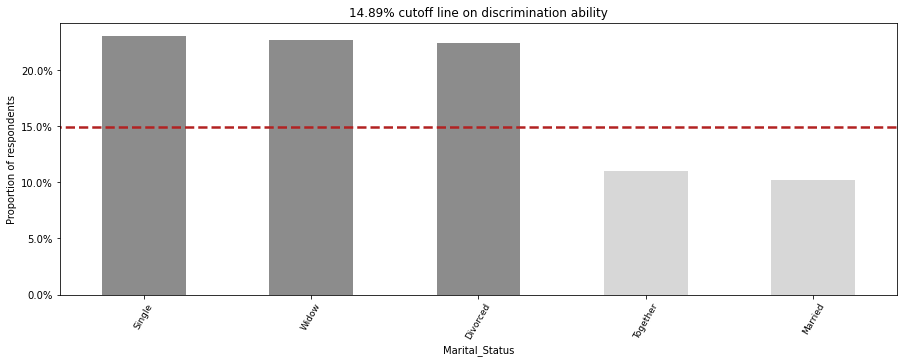

In [23]:
categorical_discrimination_plot(df, df.select_dtypes(include=["object", "category"]).columns, "Response")

In [26]:
# Describe Numerical Features

In [27]:
describe_num=df.describe(percentiles=np.arange(0.2, .8, .2))
display(describe_num)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,...,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.0,1766.0,1766.000000
mean,5591.232163,1968.855040,51610.984711,0.441676,0.506795,48.771234,299.983579,25.944507,166.294451,36.650623,...,5.343148,0.070781,0.070215,0.071348,0.061721,0.013590,0.008494,3.0,11.0,0.148924
std,3238.606859,11.848976,21773.344045,0.531976,0.542483,29.027208,334.011895,39.598685,226.885089,53.410598,...,2.398778,0.256532,0.255582,0.257478,0.240717,0.115814,0.091795,0.0,0.0,0.356115
min,0.000000,1899.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
20%,2276.000000,1957.000000,31761.000000,0.000000,0.000000,19.000000,15.000000,1.000000,11.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
40%,4436.000000,1967.000000,44159.000000,0.000000,0.000000,38.000000,79.000000,4.000000,34.000000,7.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5483.500000,1970.000000,51038.000000,0.000000,0.000000,49.000000,171.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
60%,6583.000000,1973.000000,57957.000000,1.000000,1.000000,58.000000,277.000000,14.000000,108.000000,20.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
80%,9010.000000,1979.000000,71391.000000,1.000000,1.000000,79.000000,577.000000,43.000000,292.000000,65.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [28]:
# remove useless columns -> Variance equal to zero

In [29]:
const=describe_num.columns[describe_num.loc["std"]<0.01]
print("Columns with zero or almost zero variance to be removed:\n", 
      list(const))

# remove constants
df.drop(labels=const, axis=1, inplace=True) 

# test

df_test.drop(labels=const, axis=1, inplace=True)

Columns with zero or almost zero variance to be removed:
 ['Z_CostContact', 'Z_Revenue']


In [30]:
# Negative features == > meter a zero
print(">>> Any column with negative values?:", 
      (df._get_numeric_data()<0).any().any())

>>> Any column with negative values?: False


In [31]:
# Remove duplicates with response fea

In [32]:
#df_x = df.drop(columns='Response')
#df_y = df.Response

In [33]:
#df_x[df_x.duplicated(keep=False)].sort_values(by='Income').head()

In [34]:
#print('Duplicate observations with different target values:',len(df_x[df_x.duplicated(keep=False)])-len(df[df.duplicated(keep=False)]))

In [35]:
#duplicates_no_target = list(df_x[df_x.duplicated(keep=False)].index)
#duplicates_target = list(df[df.duplicated(keep=False)].index.values)

In [36]:
#idx_remove = list(set(duplicates_no_target) - set(duplicates_target))
#len(idx_remove)

In [37]:
#df = df[~df.index.isin(idx_remove)]

# Correlation

In [39]:
target = "Response"
df[target]=df[target].astype('object')
feature_list = df.select_dtypes(include=["int64", "Float64"]).columns.values
feature_list = [x for x in feature_list if not x.startswith(("Year_B","AcceptedCmp"))]
feature_list.append(target)

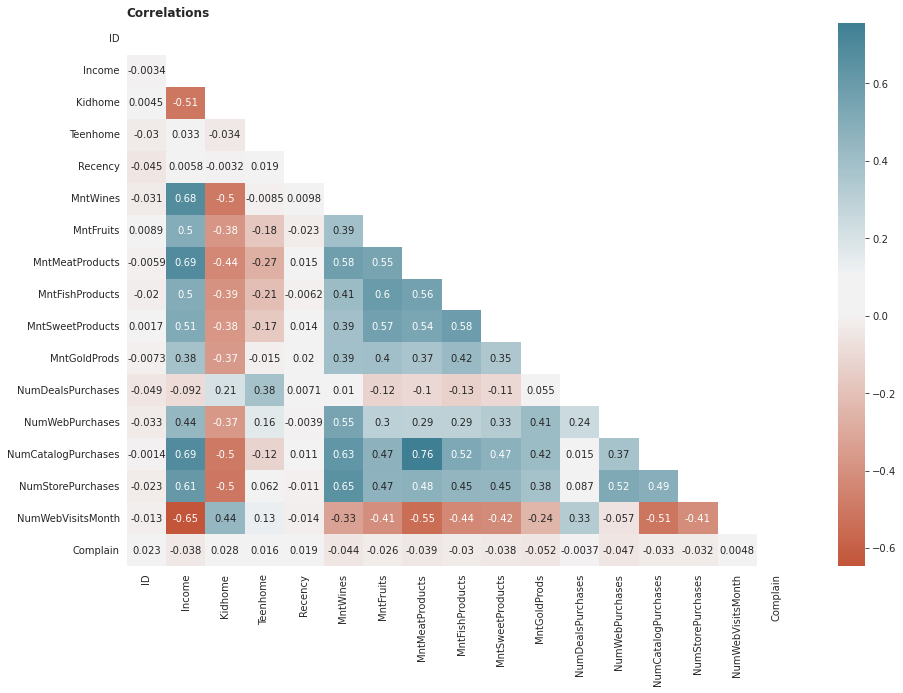

In [40]:
cmap = sns.diverging_palette(20, 220, sep = 20, as_cmap=True)


corr = df[feature_list].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize = (15,10))
    sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=0, annot= True,mask=mask,square=False, cmap = cmap)
plt.title("Correlations", loc = "left", fontweight = "bold")
plt.show()

# Outlier Detection

In [43]:
print('Trainning shape:\t',df.shape)
print('Testing shape:\t\t',df_test.shape)

Trainning shape:	 (1766, 27)
Testing shape:		 (444, 27)


In [44]:
df.values

array([[67, 1972, 'Master', ..., 0, 0, 0],
       [3828, 1951, 'Graduation', ..., 0, 0, 0],
       [3409, 1984, 'Graduation', ..., 0, 0, 0],
       ...,
       [4654, 1992, 'Graduation', ..., 0, 0, 0],
       [1463, 1958, 'Graduation', ..., 0, 0, 0],
       [8026, 1952, 'Graduation', ..., 0, 0, 0]], dtype=object)

In [45]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
1037,67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,...,0,4,7,0,0,0,0,0,0,0


In [46]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.dtypes

ID                       int64
Year_Birth               int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
dtype: object

In [47]:
distribution_cols = ['Income', 'Recency']
distribution_cols += [x for x in df_numeric.columns if x.startswith('Mnt') or x.startswith('Num')]

<function matplotlib.pyplot.show(close=None, block=None)>

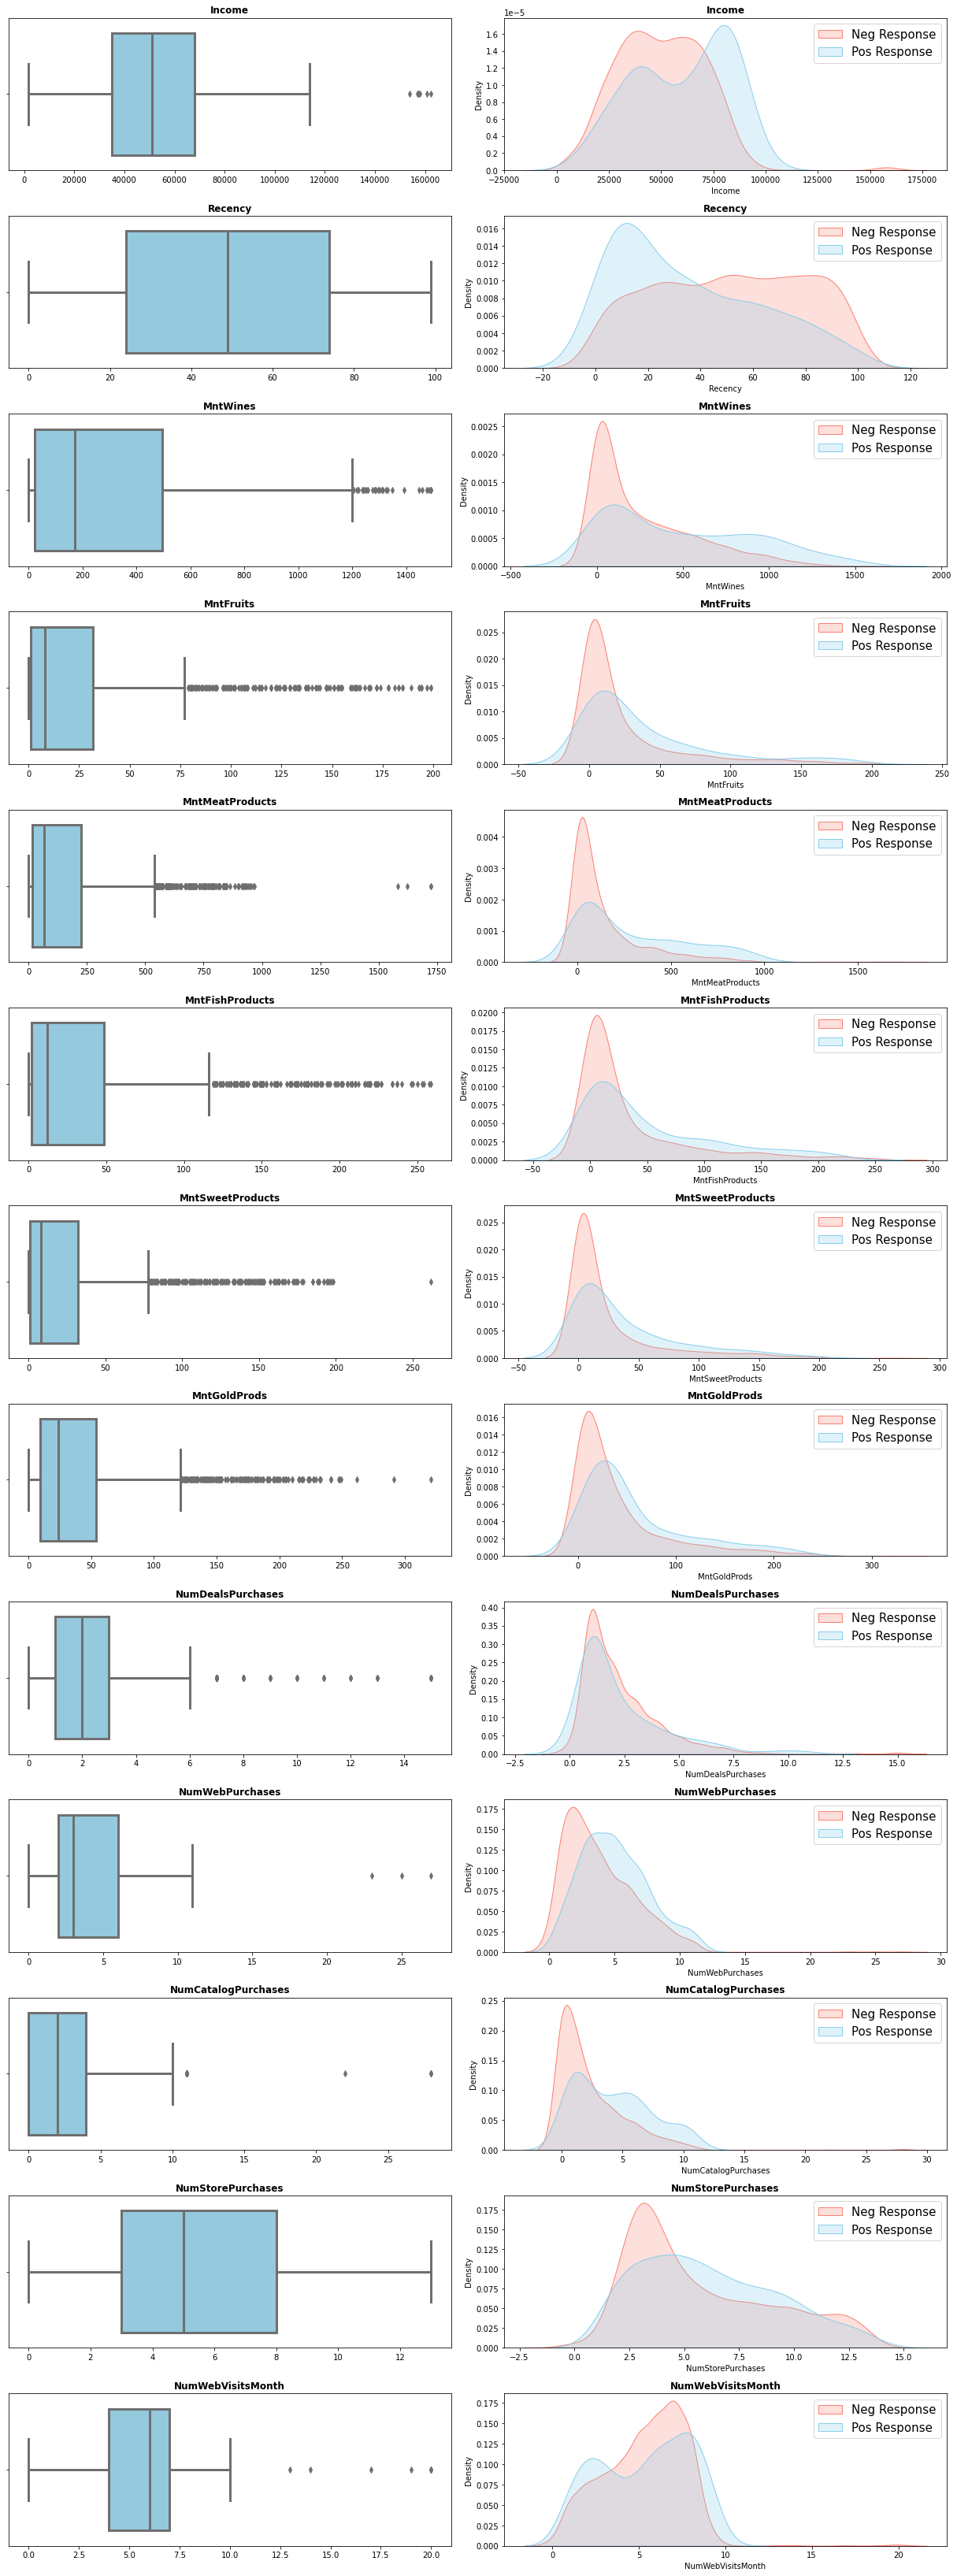

In [48]:
fig = plt.figure(figsize=(17, 80))
i = 1
for col in distribution_cols:
    ax = fig.add_subplot(df_numeric.shape[1], 2, i)
    box = sns.boxplot(x=col,data=df, linewidth=3, color="skyblue")
    ax.set_xlabel(None)
    ax = fig.add_subplot(df_numeric.shape[1], 2, i+1)
    p1 = sns.kdeplot(df.loc[df.Response==0,col], shade=True, color="salmon", label='Neg Response')
    p1 = sns.kdeplot(df.loc[df.Response==1,col], shade=True, color="skyblue", label='Pos Response')
    ax.set_title(col, fontweight = 'bold')
    ax.legend(fontsize=15)
    i+=2
    
plt.tight_layout()
plt.savefig('outliers')
plt.show

In [49]:
# Methods of detection - IOR and STD

In [51]:
def filter_by_std(series_, n_stdev=3.0, return_thresholds=False):
    mean_, stdev_ = series_.mean(), series_.std()
    cutoff = stdev_ * n_stdev
    lower_bound, upper_bound = mean_ - cutoff, mean_ + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]
    
def filter_by_iqr(series_, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(series_, 25), np.percentile(series_, 75)
    iqr = q75-q25
    
    cutoff = iqr*k
    lower_bound, upper_bound = q25-cutoff, q75+cutoff
    
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series_]
    
def plot_filter_by_stdev(df, feature, n_stdev=3.0, color="red"):
    lower_bound, upper_bound = filter_by_std(df[feature], n_stdev=n_stdev, return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] <lower_bound], default=df[feature].min()), lower_bound, alpha=0.2, color=color)
    plt.axvspan(upper_bound, max(df[feature][df[feature] > upper_bound], default=df[feature].max()), alpha=0.2, color=color)
    plt.title("Outliers in {} by {} standard deviations:\n".format(feature, n_stdev))
    
def plot_filter_by_iqr(df, feature, k=1.5, color="red"):
    lower_bound, upper_bound = filter_by_iqr(df[feature], k=k, return_thresholds=True)
    if df[feature].min()<=0:
        plt.axvspan(min(df[feature][df[feature] <lower_bound], default=df[feature].min()), lower_bound, alpha=0.2, color=color)
    plt.axvspan(upper_bound, max(df[feature][df[feature] > upper_bound], default=df[feature].max()), alpha=0.2, color=color)
    plt.title("Outliers in {} by {} k in IQR:\n".format(feature, k))

In [52]:
# Don't Apply to binary variables 

non_binary = [x for x in df_numeric.columns.values if not x.startswith("Acc") and not x.startswith('Compl')]
print(non_binary)

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


In [53]:
# Comparing

In [54]:
outliers_dict=dict()
def add_outliers_method(method, idx_to_remove, outliers_dict):
    
    outliers_dict[method]= idx_to_remove 
    return(outliers_dict)

In [55]:
#for feature in df_numeric.columns:     
idx_to_remove_std = []
idx_to_remove_iqr = []
for feature in non_binary:
    id_std = df_numeric[feature][filter_by_std(df_numeric[feature], 3)].index.tolist()
    id_iqr = df_numeric[feature][filter_by_iqr(df_numeric[feature], 1.7)].index.tolist()
    idx_to_remove_std.append(id_std)
    idx_to_remove_iqr.append(id_iqr)
    cross_outliers = list(set(id_std).intersection(id_iqr))
    idx_to_remove = set(cross_outliers)
    print(feature,'Number of outliers:\t{}'.format(len(cross_outliers))) 
    print(feature,'Percentage of dataset:\t{0:.0%}'.format(len(cross_outliers)/len(df_numeric))) 
    print('----------------------------------') 

   
#flatten list
idx_to_remove_std = [item for sublist in idx_to_remove_std for item in sublist]
idx_to_remove_iqr = [item for sublist in idx_to_remove_iqr for item in sublist]
# cross_outliers
cross_outliers = list(set(idx_to_remove_std).intersection(idx_to_remove_iqr))
# keep unique
idx_to_remove = set(cross_outliers)
#print('Outlier ID: {}'.format(cross_outliers)) 
print('----------------------------------') 
print('Number of outliers:\t{}'.format(len(cross_outliers))) 
print('Percentage of dataset:\t{0:.0%}'.format(len(cross_outliers)/len(df_numeric))) 
print('----------------------------------') 

outliers_dict=add_outliers_method('3std_17iqr', cross_outliers, outliers_dict)

ID Number of outliers:	0
ID Percentage of dataset:	0%
----------------------------------
Year_Birth Number of outliers:	2
Year_Birth Percentage of dataset:	0%
----------------------------------
Income Number of outliers:	7
Income Percentage of dataset:	0%
----------------------------------
Kidhome Number of outliers:	0
Kidhome Percentage of dataset:	0%
----------------------------------
Teenhome Number of outliers:	0
Teenhome Percentage of dataset:	0%
----------------------------------
Recency Number of outliers:	0
Recency Percentage of dataset:	0%
----------------------------------
MntWines Number of outliers:	14
MntWines Percentage of dataset:	1%
----------------------------------
MntFruits Number of outliers:	52
MntFruits Percentage of dataset:	3%
----------------------------------
MntMeatProducts Number of outliers:	25
MntMeatProducts Percentage of dataset:	1%
----------------------------------
MntFishProducts Number of outliers:	48
MntFishProducts Percentage of dataset:	3%
-------

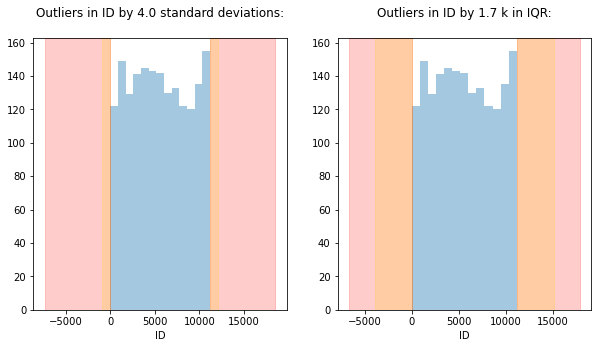

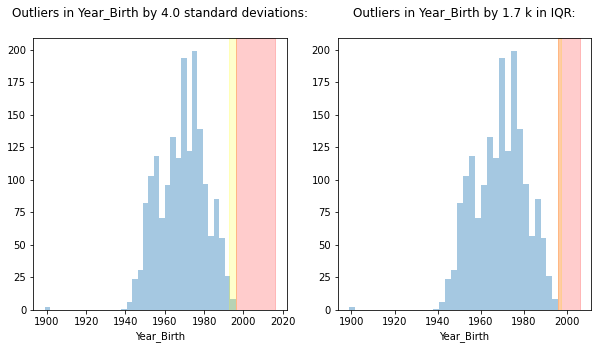

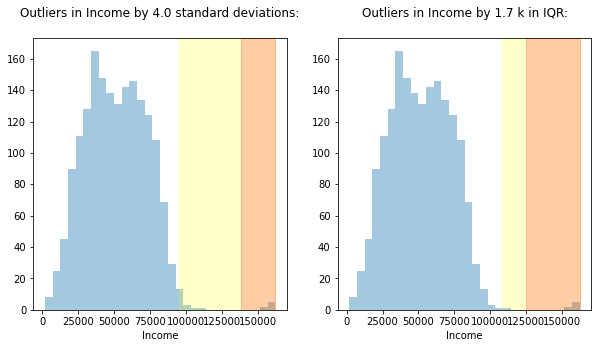

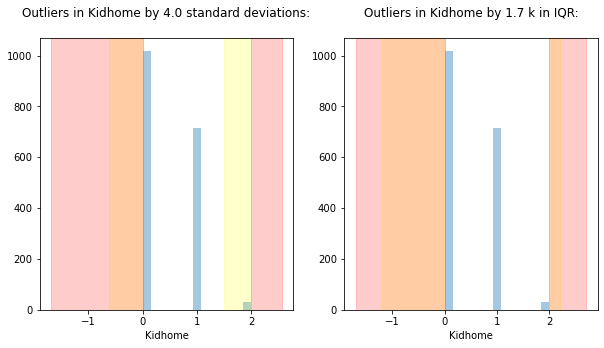

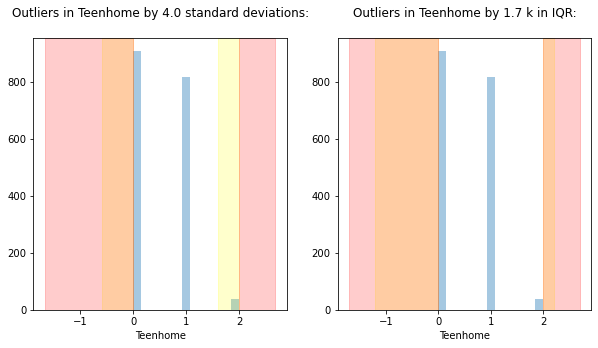

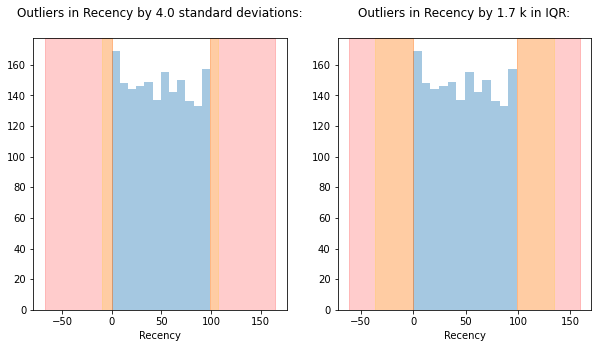

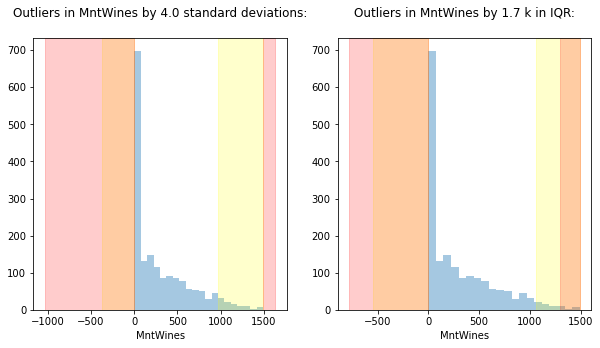

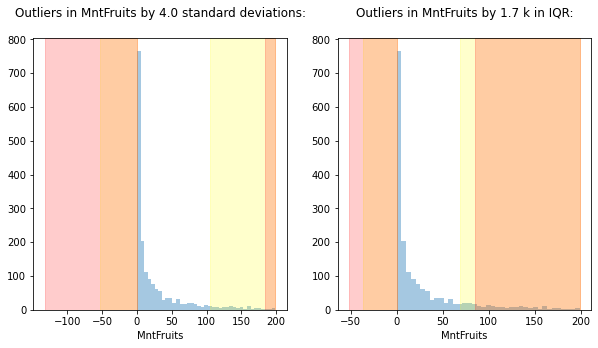

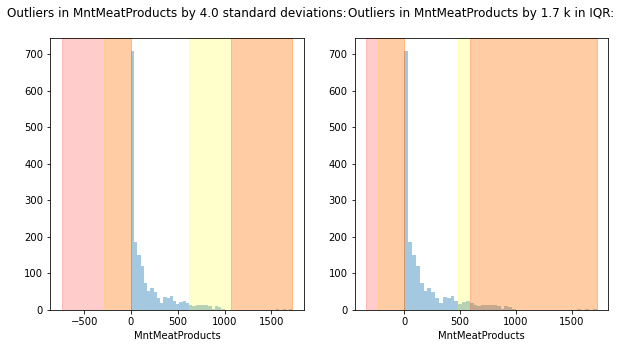

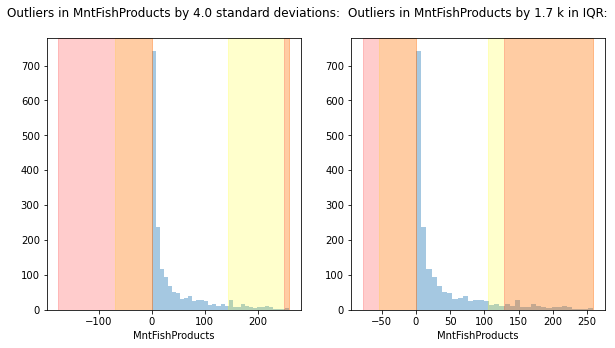

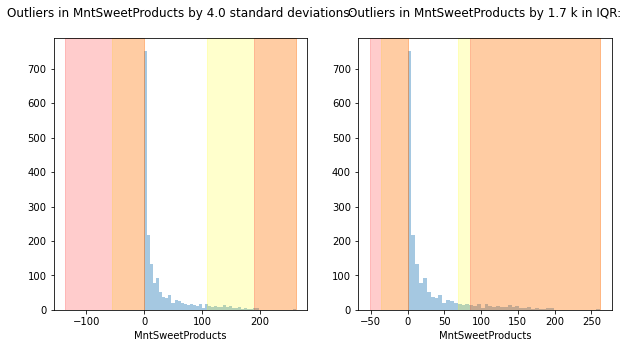

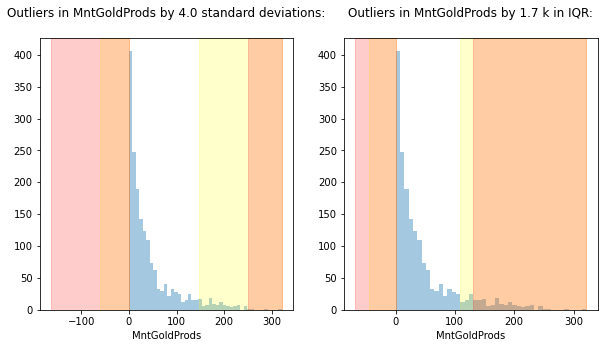

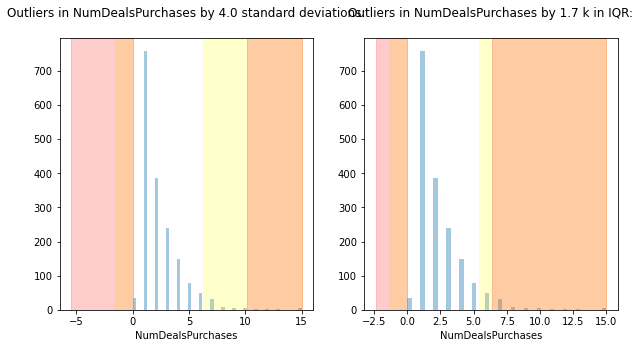

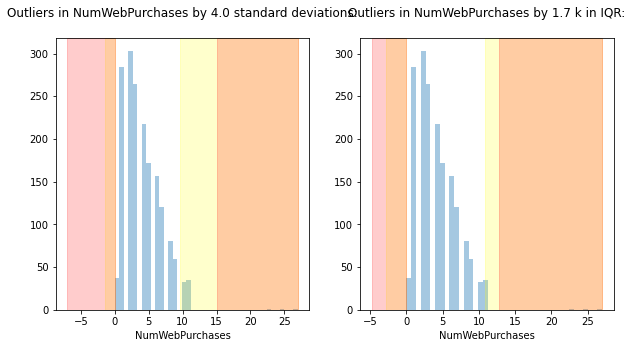

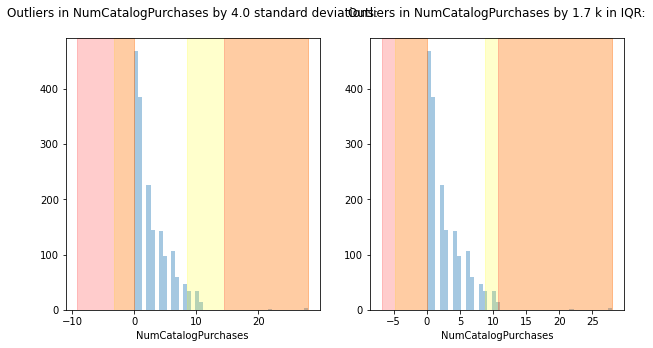

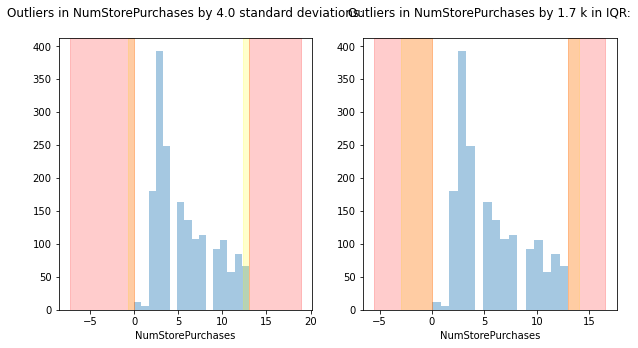

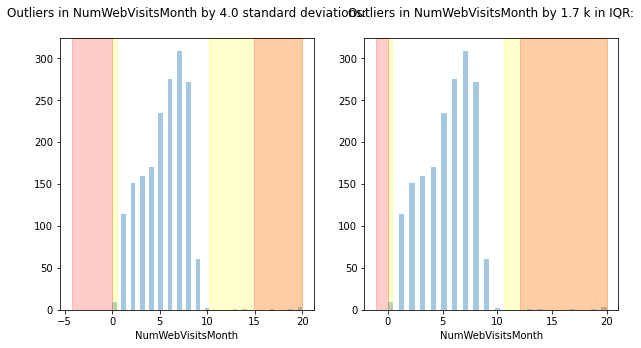

In [56]:
for feature in non_binary:    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.distplot(df_numeric[feature], kde=False)
    plot_filter_by_stdev(df_numeric, feature, n_stdev=2.0, color='yellow')
    plot_filter_by_stdev(df_numeric, feature, n_stdev=4.0, color='red')
    plt.subplot(122)
    sns.distplot(df_numeric[feature], kde=False)
    plot_filter_by_iqr(df_numeric, feature, k=1.2, color='yellow')
    plot_filter_by_iqr(df_numeric, feature, k=1.7, color='red')

In [57]:
# DBSCAN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_var = scaler.fit_transform(df_numeric[non_binary])
scaled_df = pd.DataFrame(scaled_var, columns = non_binary)
scaled_df.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.005987,0.752577,0.278172,0.5,0.5,0.060606,0.045546,0.000000,0.009275,0.000000,0.000000,0.024922,0.200000,0.074074,0.000000,0.307692,0.35
1,0.342061,0.536082,0.431806,0.0,0.5,0.616162,0.356999,0.050251,0.125797,0.764479,0.664122,0.607477,0.133333,0.259259,0.214286,1.000000,0.20
2,0.304620,0.876289,0.213971,0.5,0.0,0.686869,0.094441,0.040201,0.074783,0.011583,0.041985,0.146417,0.200000,0.259259,0.035714,0.307692,0.45
3,0.844518,0.680412,0.446937,0.0,0.5,0.929293,0.543202,0.381910,0.248116,0.382239,0.522901,0.333333,0.200000,0.370370,0.142857,0.692308,0.35
4,0.555000,0.793814,0.221981,0.5,0.0,0.474747,0.012056,0.000000,0.005217,0.000000,0.003817,0.034268,0.066667,0.037037,0.000000,0.230769,0.30


In [58]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
                          eps = 0.5,
                          metric="euclidean",
                          min_samples = 2,
                          n_jobs = -1)
clusters = outlier_detection.fit_predict(scaled_df)
cluster = pd.concat([scaled_df,pd.Series(clusters)],axis = 1)
idx_dbscan = cluster.loc[cluster[0] == -1].index.tolist()

outliers_dict=add_outliers_method('dbscan', idx_dbscan, outliers_dict)

# Sklearn outlier detection

In [60]:
x = df_numeric[non_binary]
x.head(1)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1037,67,1972,46423.0,1,1,6,68,0,16,0,0,8,3,2,0,4,7


In [61]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

# training the model
clf = IsolationForest(max_samples=500, random_state=0)
clf.fit(x)

# predictions
predictions = clf.predict(x)


In [62]:
x['isolation_forest']=predictions.tolist()
idx_isolation=x.loc[x['isolation_forest'] == -1].index.tolist()
x.drop(columns=['isolation_forest'])

outliers_dict=add_outliers_method('isolation_forest',idx_isolation, outliers_dict)


In [63]:
from collections import Counter

print(Counter(predictions).keys())
print(Counter(predictions).values())


dict_keys([1, -1])
dict_values([1493, 273])


In [64]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

In [65]:
clf = LocalOutlierFactor(novelty = True)
y_pred = clf.fit(x)


In [66]:
# predictions
predictions = clf.predict(x)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
x['lof']=predictions.tolist()
idx_isolation=x.loc[x['lof'] == -1].index.tolist()
x.drop(columns=['lof'])
outliers_dict=add_outliers_method('lof',idx_isolation, outliers_dict)


In [68]:
from collections import Counter


print(Counter(predictions).keys())
print(Counter(predictions).values())

dict_keys([1, -1])
dict_values([1756, 10])


# Mahalanobis

In [70]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
x = df_numeric[non_binary]
#x = scaled_df.copy()

inv_cov = x.cov().values
inv_cov = sp.linalg.inv(inv_cov)
mean = x.mean().values

def mahalanobis_dis(X,meanCol,IC):
    md = pd.DataFrame(columns=['mahalanobis'], index=X.index)
    for i in X.index.values:
        md['mahalanobis'][i]=mahalanobis(X.loc[i,],meanCol,IC)
    return(md)

In [71]:
mahal_dis=mahalanobis_dis(x, mean, inv_cov)

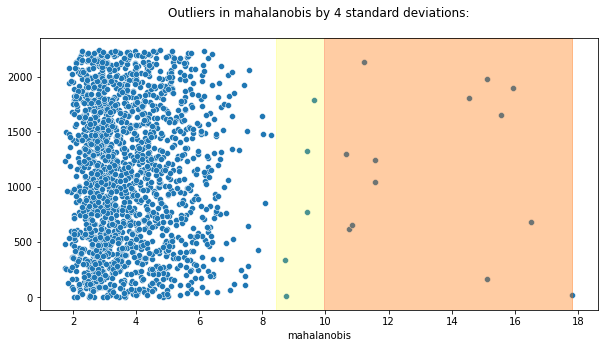

In [72]:
#PLOT distances
n_dev=4

plt.figure(figsize=(10,5))
sns.scatterplot(mahal_dis['mahalanobis'], mahal_dis.index)
plot_filter_by_stdev(mahal_dis, 'mahalanobis', n_stdev=n_dev-1, color='yellow') #normalize
plot_filter_by_stdev(mahal_dis, 'mahalanobis', n_stdev=n_dev, color='red') #delete
plt.show()

In [73]:
#dealing with outliers

m_std=mahal_dis[mahal_dis.columns[0]].std()
m_mean=mahal_dis[mahal_dis.columns[0]].mean()

n_dev=4
outliers=mahal_dis[mahal_dis[mahal_dis.columns[0]]>=(m_mean+(m_std*n_dev))]

idx_mahalanobis4=outliers.index
print('mahalanobis','Number of outliers:\t{} with {} std'.format(len(outliers), n_dev)) 
print('mahalanobis','Percentage of dataset:\t{0:.2%}'.format(len(outliers)/len(mahal_dis))) 
print('----------------------------------') 

outliers_dict=add_outliers_method('mahalanobis_4',idx_mahalanobis4, outliers_dict)

mahalanobis Number of outliers:	13 with 4 std
mahalanobis Percentage of dataset:	0.74%
----------------------------------


In [74]:
n_dev=4
dec='del'
dec_1=''

out=mahal_dis[mahal_dis['mahalanobis']>=(m_mean+(m_std*(n_dev-1)))]
inliers=mahal_dis[mahal_dis['mahalanobis']<(m_mean+(m_std*(n_dev-1)))]

max_dist = max(inliers.mahalanobis)
ind=inliers[inliers['mahalanobis'] == max_dist].index[0]

for_delete=[]

for i in out.index:
    if out.mahalanobis[i]>=m_mean+(m_std*(n_dev)):
        if dec=='del':
            for_delete.append(i)
        else:
            ind=find_nearest(i,out.mahalanobis[i], inliers)
            df.loc[i]=df.loc[ind]
    else:
        if dec_1=='del':
            for_delete.append(i)
        else:
            df.loc[i]=df.loc[ind]

df_after_mahal=df[~df.index.isin(for_delete)]            

In [76]:
print(df_after_mahal.shape, df.shape)

(1753, 27) (1766, 27)


In [77]:
### checking unispatial outliers after removing multidimensional space outliers

out=df_after_mahal[non_binary]
m=out.mean()
s=out.std()
out.shape

(1753, 17)

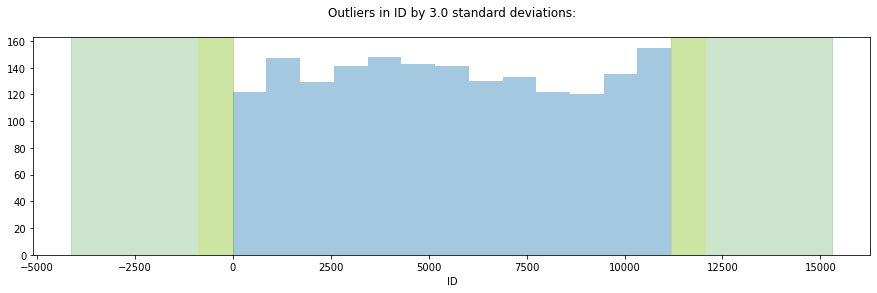

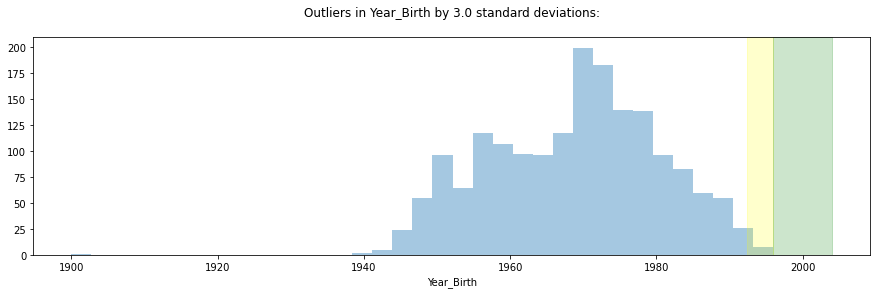

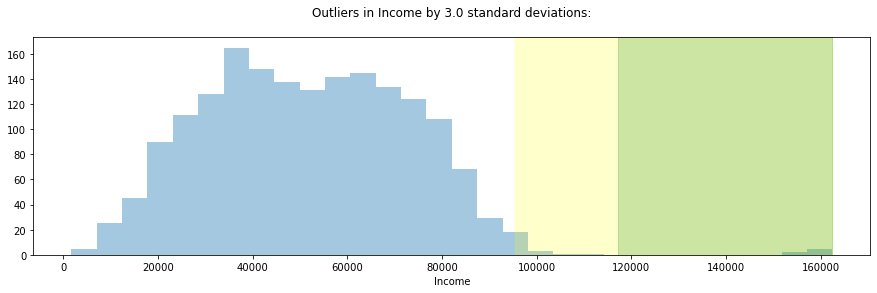

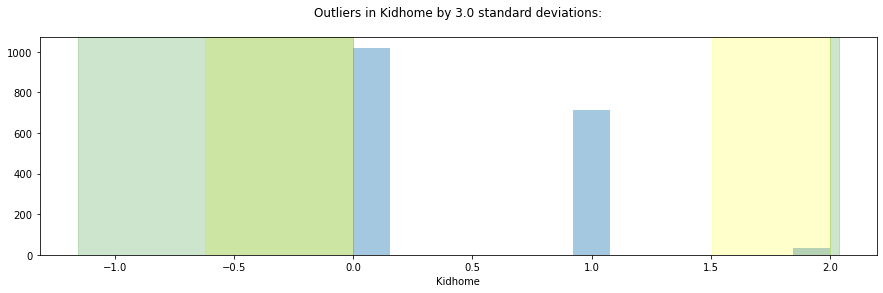

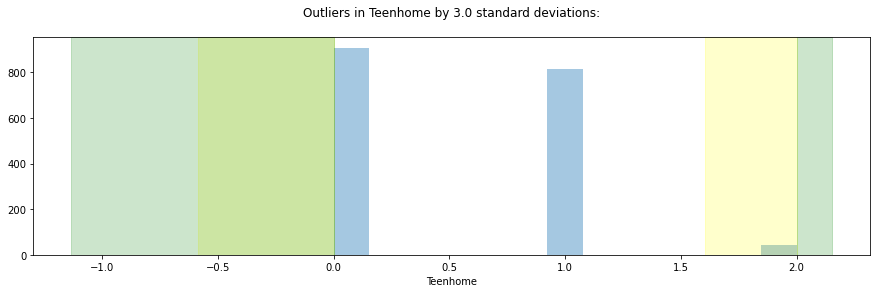

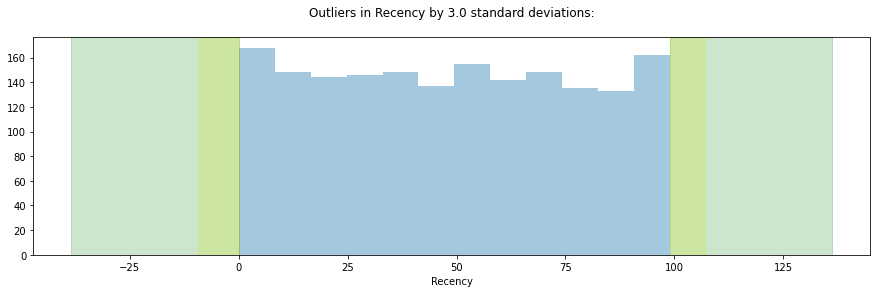

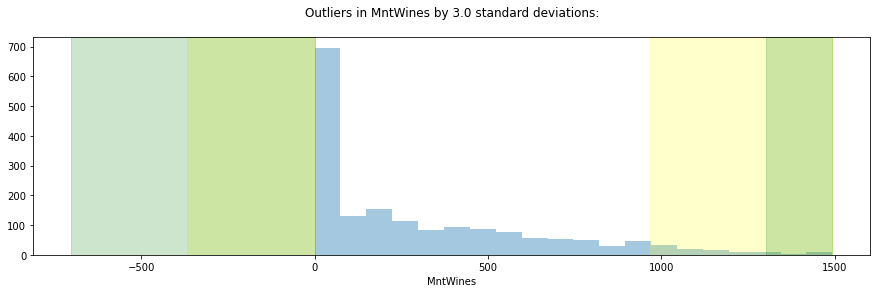

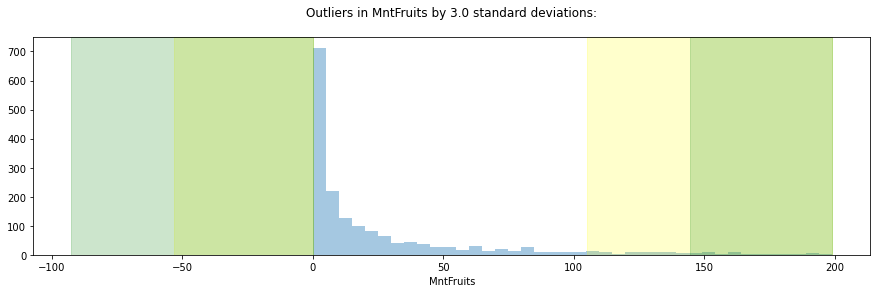

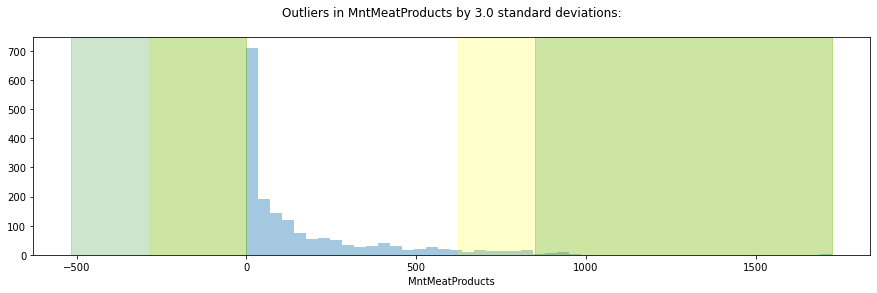

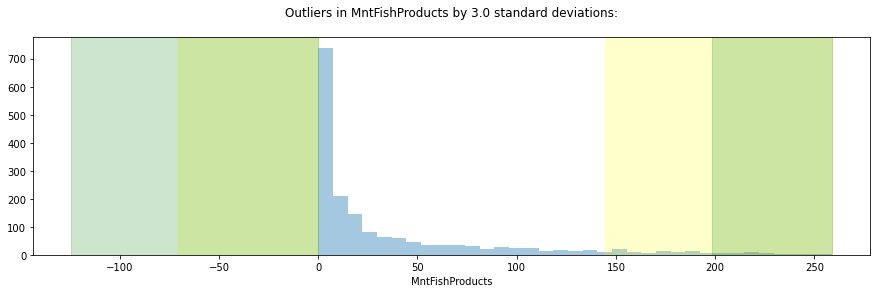

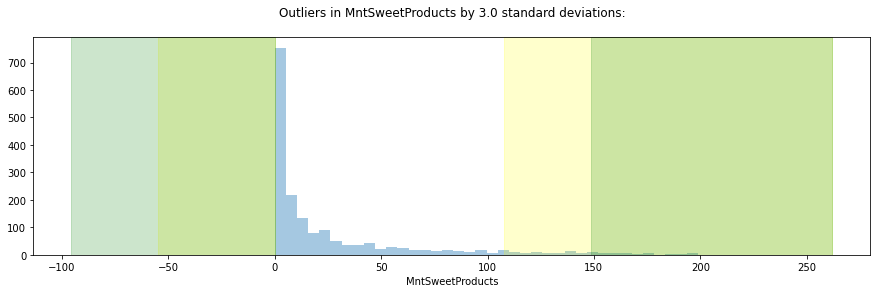

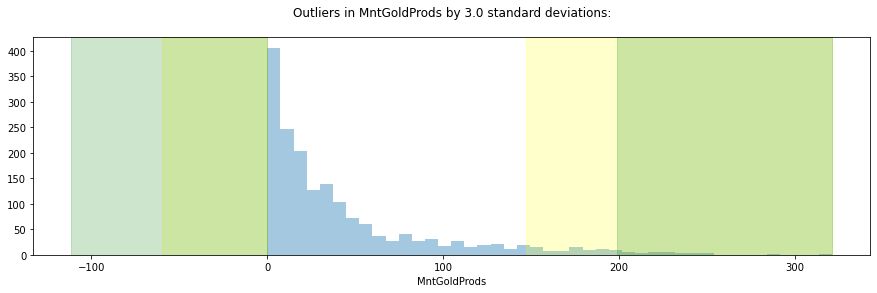

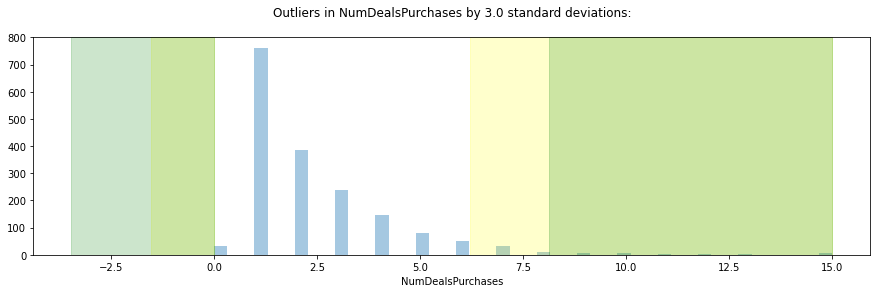

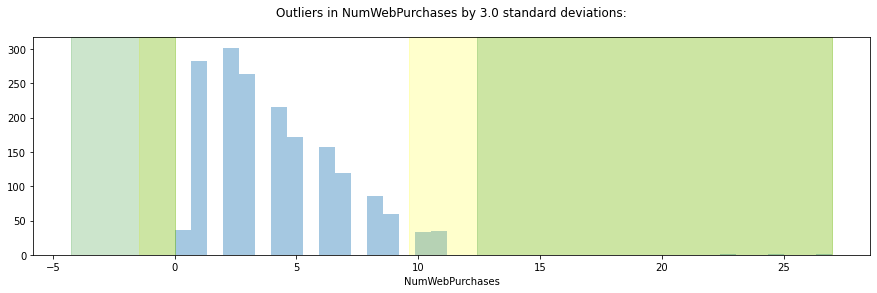

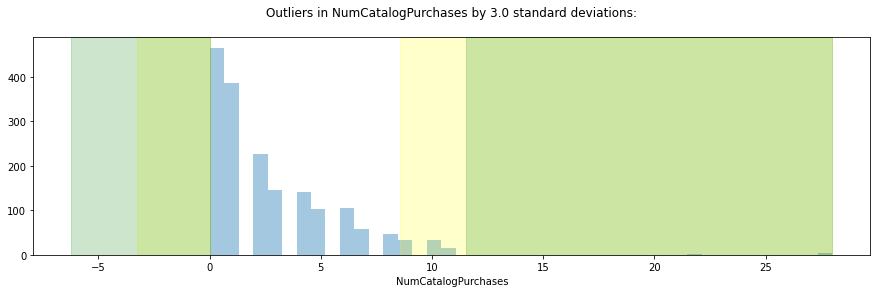

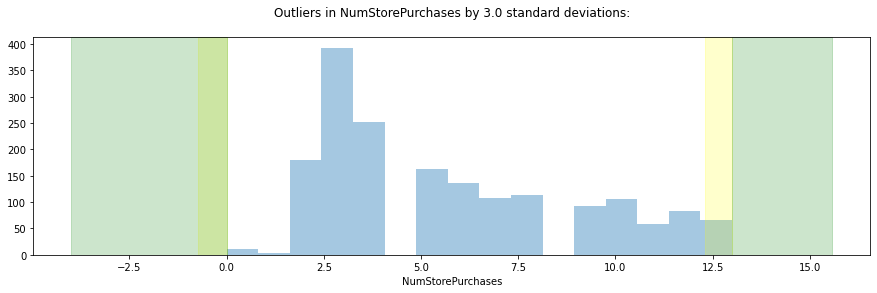

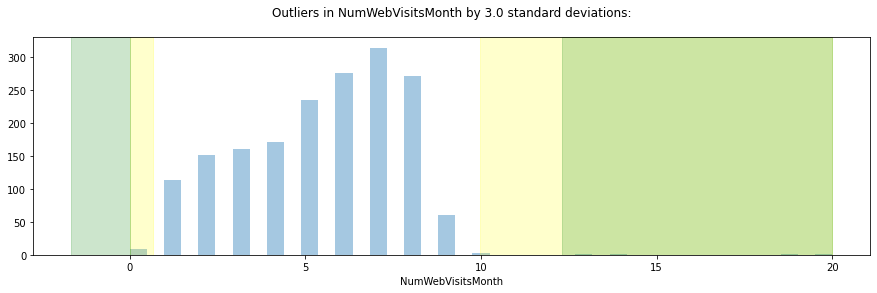

In [78]:
for feature in non_binary:    
    plt.figure(figsize=(15,4))
    sns.distplot(df[feature], kde=False)
    plot_filter_by_stdev(df, feature, n_stdev=2.0, color='yellow')
    plot_filter_by_stdev(df, feature, n_stdev=3.0, color='green')


In [79]:
counter=0
mais=0
menos=0
n_std=4

idx_mahalanobis4 = list(idx_mahalanobis4)
#to check number of outliers per feature
for col in out.columns:
    
    mais=0
    menos=0
    for i in out.index:
        if df_after_mahal[col][i]>=m[col]+(s[col]*n_std):
            counter+=1
            mais+=1
            idx_mahalanobis4.append(i)
            
        elif df_after_mahal[col][i]<=m[col]-(s[col]*n_std):
            counter+=1
            menos+=1
            idx_mahalanobis4.append(i)
            #df.drop(axis=0, index=[i], inplace=True)
    print(col,'total:', counter, 'right ', mais, 'left ', menos)
    
outliers_dict=add_outliers_method('mahal_uni4', idx_mahalanobis4, outliers_dict)

ID total: 0 right  0 left  0
Year_Birth total: 1 right  0 left  1
Income total: 1 right  0 left  0
Kidhome total: 1 right  0 left  0
Teenhome total: 1 right  0 left  0
Recency total: 1 right  0 left  0
MntWines total: 1 right  0 left  0
MntFruits total: 12 right  11 left  0
MntMeatProducts total: 12 right  0 left  0
MntFishProducts total: 16 right  4 left  0
MntSweetProducts total: 27 right  11 left  0
MntGoldProds total: 29 right  2 left  0
NumDealsPurchases total: 43 right  14 left  0
NumWebPurchases total: 43 right  0 left  0
NumCatalogPurchases total: 43 right  0 left  0
NumStorePurchases total: 43 right  0 left  0
NumWebVisitsMonth total: 43 right  0 left  0


In [80]:
#max value without n_std
def valid_values(col, n_std):
    
        m = col.mean()
        s= col.std()
        valid=col[col<m+(s*n_std)]
        valid=valid[valid>m-(s*n_std)]
    

        return(valid.min(), valid.max())



#to change oultiers by max or min value admisseble
for col in out.columns:
    
    bottom, top = valid_values(df_after_mahal[col], n_std)

    for i in df_after_mahal.index.values:
        
        if df_after_mahal[col][i]>=m[col]+(s[col]*n_std):
         
            df_after_mahal[col][i]=top
            
        elif df_after_mahal[col][i]<=m[col]-(s[col]*n_std):
            df_after_mahal[col][i]=bottom

In [81]:
# Compare the models with different methods

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, recall_score, average_precision_score

In [85]:
n_splits = 5
outliers_df=pd.DataFrame(index=range(len(outliers_dict.keys())*n_splits), columns=(['method','recall', 'accuracy', 'precision', 'f1']))
CV = KFold(n_splits=n_splits)

In [ ]:
n_splits = 10
scoring =['recall', 'accuracy', 'precision', 'f1']
entries = []

scaler = MinMaxScaler()
l=pd.DataFrame()

for score in scoring:
   
    entries = []
    for key in outliers_dict.keys():

        y_train = df['Response'].loc[set(df.index)-set(outliers_dict[key])]
        x = df.loc[set(df.index)-set(outliers_dict[key])].select_dtypes(include=['number'])

        x_train = scaler.fit_transform(x)
        accuracies = cross_val_score(LogisticRegression(n_jobs=-1), x_train, y_train, scoring=score, cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((key, fold_idx, accuracy))
        
    outliers_df = pd.DataFrame(entries, columns=['method', 'fold_idx', score])
    l[score] = outliers_df.groupby('method')[score].agg('mean')
#l.append(cv_df.groupby('model_name')[score].agg('mean'))
   

# Trying with new variable

* Age
* Days_as_cust: # of days as customer
* Mnt_tot: Sum of all purchases mnt
* Frq: # of times the client made a purchase
* Childnum: total # of children (kids+teens)
* RatioMntFrq: Monetary over # of purchases
* RatioMntIncome: Monetary over income
* AcceptedTot: Total # of accepted campaigns
* RatioDealFrq: Ratio of purchases with discount
* RatioWebPurchWebVisit: # of purchases over visits
* Each expense in percentage
* Ratio channel of purchase

In [97]:
# AGE

In [94]:
most_recent_obs = df['Dt_Customer'].max()
most_recent_obs

# test

df_test['Age'] = most_recent_obs.year - df_test.Year_Birth

In [95]:
df['Age'] = most_recent_obs.year - df.Year_Birth

In [96]:
df[["Year_Birth","Age"]].head(1)

,Year_Birth,Age
1037,1972,42


In [98]:
# Days as Cust

In [99]:
# Days
df['Days_as_cust'] = most_recent_obs - df.Dt_Customer
df['Days_as_cust'] = df['Days_as_cust'].dt.days

# test
df_test['Days_as_cust'] = most_recent_obs - df_test.Dt_Customer
df_test['Days_as_cust'] = df_test['Days_as_cust'].dt.days

In [100]:
df[["Dt_Customer","Days_as_cust"]].head(1)

,Dt_Customer,Days_as_cust
1037,2013-09-18,284


In [103]:
#Mnt_tot

In [102]:
mnt_features = [x for x in df.columns.values if x.startswith("Mnt")]

In [104]:
df['Mnt_tot'] = np.sum(df[mnt_features], axis=1)

# test
df_test['Mnt_tot'] = np.sum(df_test[mnt_features], axis=1)

In [105]:
pd.concat([df[mnt_features],df["Mnt_tot"]], axis=1).head(1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Mnt_tot
1037,68,0,16,0,0,8,92


In [107]:
#Frq

In [108]:
df['Frq'] = np.sum(df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]], axis=1)

# test
df_test['Frq'] = np.sum(df_test[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]], axis=1)

In [110]:
df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Frq"]].head(1)

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Frq
1037,2,0,4,6


In [112]:
#Childnum

In [114]:
df['Childnum'] = np.sum(df[["Kidhome","Teenhome"]], axis=1)

# test
df_test['Childnum'] = np.sum(df_test[["Kidhome","Teenhome"]], axis=1)

In [115]:
df[["Kidhome","Teenhome","Childnum"]].head(2)

,Kidhome,Teenhome,Childnum
1037,1,1,2
1729,0,1,1


In [117]:
#R_MntFrq

In [116]:
df['R_MntFrq'] = np.divide(df['Mnt_tot'],df['Frq'])

# test
df_test['R_MntFrq'] = np.divide(df_test['Mnt_tot'],df_test['Frq'])

In [118]:
df[["Mnt_tot","Frq","R_MntFrq"]].head(1)

,Mnt_tot,Frq,R_MntFrq
1037,92,6,15.333333


In [119]:
#RatioMntIncome

In [120]:
df['R_MntIncome'] = np.divide(df['Mnt_tot'],df['Income'])

# test
df_test['R_MntIncome'] = np.divide(df_test['Mnt_tot'],df_test['Income'])

In [121]:
df[["Mnt_tot","Income","R_MntIncome"]].head(1)

,Mnt_tot,Income,R_MntIncome
1037,92,46423.0,0.001982


In [122]:
#AcceptedTot

In [123]:
Accept_cat = [x for x in df.columns.values if x.startswith("AcceptedCmp")]

In [124]:
df['AcceptedTot'] = np.sum(df[Accept_cat], axis=1)

# test
df_test['AcceptedTot'] = np.sum(df_test[Accept_cat], axis=1)


In [125]:
pd.concat([df[Accept_cat],df["AcceptedTot"]], axis=1).loc[pd.concat([df[Accept_cat],df["AcceptedTot"]], axis=1).AcceptedTot ==3].head(1)

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedTot
1711,1,0,1,1,0,3


In [126]:
#RatioDealFrq

In [127]:
df['R_DealFrq'] = np.divide(df['NumDealsPurchases'],df['Frq'])

# test
df_test['R_DealFrq'] = np.divide(df_test['NumDealsPurchases'],df_test['Frq'])


In [128]:
df[["NumDealsPurchases","Frq","R_DealFrq"]].head(1)

,NumDealsPurchases,Frq,R_DealFrq
1037,3,6,0.5


In [129]:
#### Ratio Mnts specific vs Mnt_tot

In [130]:
for feat in mnt_features:
    df['R_'+ feat] = df[feat]/df["Mnt_tot"]
    # test
    df_test['R_'+ feat] = df_test[feat]/df_test["Mnt_tot"]

In [131]:
df[["MntWines", "Mnt_tot", "R_MntWines"]].head(1)

,MntWines,Mnt_tot,R_MntWines
1037,68,92,0.73913


In [133]:
#RFM Score

In [134]:
# 1) bin Rcn, Frq and Mnt
feature_list, n_bins = ["Recency", "Frq", "Mnt_tot"], 5
rfm_feature_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
    feature_bin += 1
    
    if feature == "Rcn":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfm_feature_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

rfm_feature_dict.keys()

dict_keys(['Recency_bin', 'Frq_bin', 'Mnt_tot_bin'])

In [135]:
df["RFM"] = (rfm_feature_dict['Recency_bin'] + rfm_feature_dict['Frq_bin'] + rfm_feature_dict['Mnt_tot_bin']).astype(int)
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,R_MntIncome,AcceptedTot,R_DealFrq,R_MntWines,R_MntFruits,R_MntMeatProducts,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM
1037,67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,...,0.001982,0,0.5,0.73913,0.0,0.173913,0.0,0.0,0.086957,122


In [136]:
# test

feature_list, n_bins = ["Recency", "Frq", "Mnt_tot"], 5
rfm_feature_dict = {}
for feature in feature_list:
    bindisc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="quantile")
    feature_bin = bindisc.fit_transform(df_test[feature].values[:, np.newaxis])
    feature_bin = pd.Series(feature_bin[:, 0], index=df_test.index)
    feature_bin += 1
    
    if feature == "Rcn":
        feature_bin = feature_bin.sub(5).abs() + 1
    rfm_feature_dict[feature+"_bin"] = feature_bin.astype(int).astype(str)

rfm_feature_dict.keys()
df_test["RFM"] = (rfm_feature_dict['Recency_bin'] + rfm_feature_dict['Frq_bin'] + rfm_feature_dict['Mnt_tot_bin']).astype(int)


In [137]:
#Channel Ratios

In [138]:
channels = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for channel in channels:
    df['R_'+channel] = df[channel]/df['Frq']
    # test
    df_test['R_'+channel] = df_test[channel]/df_test['Frq']

In [139]:
df[['NumWebPurchases','Frq','R_NumWebPurchases']].head(1)

,NumWebPurchases,Frq,R_NumWebPurchases
1037,2,6,0.333333


In [140]:
channels = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for channel in channels:
    df['R_Mnt_'+channel] = df[channel]/df['Mnt_tot']
     # test
    df_test['R_Mnt_'+channel] = df_test[channel]/df_test['Mnt_tot']

In [141]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases
1037,67,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,...,0.0,0.0,0.086957,122,0.333333,0.0,0.666667,0.021739,0.0,0.043478


In [142]:
print('Trainning shape:\t',df.shape)
print('Testing shape:\t\t',df_test.shape)

Trainning shape:	 (1766, 49)
Testing shape:		 (444, 49)


In [143]:
# Coherence Checking

In [144]:
df['Incoherent'] = 0

In [145]:
# 1
df.loc[(df['Frq'] == 0) & (df['Mnt_tot'] > 0), 'Incoherent'] = 1
# 2
df.loc[df['Year_Birth'] > df['Dt_Customer'].dt.year, 'Incoherent'] = 2
# 3
df.loc[df['NumDealsPurchases'] > df['Frq'], 'Incoherent'] = 3
# 4
df.loc[(df['Mnt_tot'] == 0) & (df['Recency'] >= 0), 'Incoherent'] = 4

In [146]:
df.loc[df['Incoherent'] != 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases,Incoherent
1042,10749,1991,Graduation,Single,8028.0,0,0,2012-09-18,62,73,...,0.067416,0.011236,412,0.0,1.0,0.0,0.0,0.005618,0.0,3
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0.166667,0.166667,511,NaN,NaN,NaN,0.0,0.000000,0.0,1
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,0.125000,0.125000,411,NaN,NaN,NaN,0.0,0.000000,0.0,3
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0.000000,0.200000,311,NaN,NaN,NaN,0.0,0.000000,0.0,1
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,0.125000,0.125000,511,NaN,NaN,NaN,0.0,0.000000,0.0,1


In [147]:
#Search for Incoherent indexes
df.loc[df['Incoherent'] == 1][['Frq','Mnt_tot','Incoherent']]

,Frq,Mnt_tot,Incoherent
655,0,6,1
1524,0,5,1
2132,0,8,1


In [148]:
# Delete Incoherent Observations
df = df.loc[df['Incoherent']==0]

In [149]:
# We don't need incoherence column anymore
# remove date customer
# Year Birth
df.drop(columns = ['Incoherent','Dt_Customer','Year_Birth'], inplace = True)

# test
df_test.drop(columns = ['Dt_Customer','Year_Birth'], inplace = True)

In [150]:
# Categorical Variables

In [152]:
def chisq_ranker(df, continuous_flist, categorical_flist, target, n_bins=10, binning_strategy="uniform"):
    chisq_dict = {}
    if  continuous_flist:
        bindisc = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', 
                               strategy=binning_strategy)
        for feature in continuous_flist:            
            feature_bin = bindisc.fit_transform(df[feature].values[:, np.newaxis])
            feature_bin = pd.Series(feature_bin[:, 0], index=df.index)
            cont_tab = pd.crosstab(feature_bin, df[target], margins = False)
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2] 
    if  categorical_flist:
        for feature in categorical_flist:  
            cont_tab = pd.crosstab(df[feature], df[target], margins = False)          
            chisq_dict[feature] = stats.chi2_contingency(cont_tab.values)[0:2]       
    
    return chisq_dict

# There are infinites
df = df.replace([np.inf, -np.inf], np.nan).dropna()

continuous_flist = list(df.select_dtypes(include=["number"]).columns)
categorical_flist = list(df.select_dtypes(include=["object"]).columns)

In [153]:

def describe_cat(df, list_cfeatures, target):
    cat_list = []
    for feature in df[list_cfeatures]:    
        cat_list.append(df.groupby([feature]).agg({target: ['count', "mean"]}))
    return pd.concat(cat_list, axis=0, keys=list_cfeatures)

def categorical_discrimination_plot(df, list_cfeatures, target):
    rm_df_cat = describe_cat(df, list_cfeatures, target)

    cutoff_ = df[target].mean()
    cutoff_list = [cutoff_, cutoff_]
    
    for feature in list_cfeatures:
        df_cat=rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)
        color_t = ['grey' if x > cutoff_ else 'lightgrey' for x in df_cat]
        plt.figure(figsize=(15,5))
        ax = df_cat.plot.bar(color=color_t,
                             alpha = 0.9,
                             title="{}% cutoff line on discrimination ability".format(round(cutoff_*100, 2)),
                             legend=False)
        ax.set_xticklabels(df_cat.index, rotation=60, size=9)  
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        ax.set_ylabel("Proportion of respondents")
        ax.set_xlabel(feature)
        ax.plot([-1, len(df_cat)], cutoff_list,'r--', lw=2.5, color='firebrick')
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        plt.xlabel('Model',  fontweight = "bold")
        plt.show()

def categorical_merge(df, list_cfeatures, target, merge_top = False):
    tmp = df.copy()
    rm_df_cat = describe_cat(df, list_cfeatures, target)
    cutoff_ = df[target].mean()
    clean_dict = {}
    for feature in list_cfeatures:
        df_cat = pd.DataFrame({'Mean':rm_df_cat.iloc[:, 1][feature].sort_values(ascending=False)})
        to_merge_levels1 = df_cat.loc[df_cat['Mean']< cutoff_ ].index.values
        to_merge_levels2 = df_cat.loc[df_cat['Mean']> cutoff_ ].index.values

        # create dictionary with values of categories merged
        zero = len(to_merge_levels1) * [0]
        one = len(to_merge_levels2) * [1]

        dict1 = dict(list(zip(to_merge_levels1, zero)))
        dict2 = dict(list(zip(to_merge_levels2, one)))

        tmp_dict = {**dict1, **dict2}
        tmp.replace(tmp_dict, inplace=True)
        
        clean_dict.update({feature: tmp_dict})
        '''
        if merge_top:
            tmp.loc[tmp[feature].isin(to_merge_levels2), feature] = str('_'.join(to_merge_levels2))
        tmp.loc[tmp[feature].isin(to_merge_levels1), feature] = str('_'.join(to_merge_levels1))
        '''
    print(clean_dict)
    return tmp, clean_dict

def encode_categorical(df, list_cfeatures):
    for feature in list_cfeatures:
        df = pd.get_dummies(df, columns=[feature], prefix = [feature], dtype = 'int64',drop_first=True)
    return df


In [155]:
cat_merged, clean_dict = categorical_merge(df, df.select_dtypes(include=["object", "category"]).columns, 'Response',merge_top = True)


{'Education': {'Graduation': 0, '2n Cycle': 0, 'Basic': 0, 'PhD': 1, 'Master': 1}, 'Marital_Status': {'Together': 0, 'Married': 0, 'Single': 1, 'Widow': 1, 'Divorced': 1}}


In [156]:
cat_merged.head(1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases
1037,67,1,1,46423.0,1,1,6,68,0,16,...,0.0,0.0,0.086957,122,0.333333,0.0,0.666667,0.021739,0.0,0.043478


In [160]:
# Test replace categories with binary variables
# train
df.replace(clean_dict, inplace=True)

In [161]:
# Deal with strange categories

clean_dict_test = clean_dict.copy()

for feature in clean_dict_test:
    
    for category in df_test[feature].unique():
        if category not in clean_dict_test[feature].keys():
            clean_dict_test[feature].update({category: 0})
        


In [162]:
# test

df_test.replace(clean_dict_test, inplace=True)

df_test.head(1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases
848,2895,0,1,49980.0,0,1,79,104,1,54,...,0.066667,0.046154,0.071795,422,0.333333,0.111111,0.555556,0.015385,0.005128,0.025641


In [163]:
np.sort(df.columns)

array(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedTot', 'Age', 'Childnum', 'Complain',
       'Days_as_cust', 'Education', 'Frq', 'ID', 'Income', 'Kidhome',
       'Marital_Status', 'MntFishProducts', 'MntFruits', 'MntGoldProds',
       'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'Mnt_tot',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'RFM', 'R_DealFrq',
       'R_MntFishProducts', 'R_MntFrq', 'R_MntFruits', 'R_MntGoldProds',
       'R_MntIncome', 'R_MntMeatProducts', 'R_MntSweetProducts',
       'R_MntWines', 'R_Mnt_NumCatalogPurchases',
       'R_Mnt_NumStorePurchases', 'R_Mnt_NumWebPurchases',
       'R_NumCatalogPurchases', 'R_NumStorePurchases',
       'R_NumWebPurchases', 'Recency', 'Response', 'Teenhome'],
      dtype=object)

# Variable

* Chi2
* LinReg
* Random Forest
* RFE (Logistic Reg)
* Extra tree classifier
* Decision Trees

In [166]:
# Split data into features and Labels
x = df[df.columns.difference(['Response'])]
y = df['Response']

# Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns = x.columns, index=x.index)

In [167]:
def plot_importance(df,measure, top = 20):
    to_plot = pd.DataFrame(df[measure]).head(top).sort_values(by=measure)

    # 1 font
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Helvetica'

    # 2 axis style

    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # plot
    my_range=range(1,len(to_plot.index)+1)
    fig, ax = plt.subplots(figsize=(5,6))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.hlines(y=my_range, xmin=0, xmax = to_plot[measure], color='grey', alpha=0.4)
    plt.plot(to_plot[measure], my_range, "o", markersize=6, color='#007acc', alpha=0.6)
    plt.yticks(my_range, to_plot.index,fontsize=10)
    # set labels style
    ax.set_title(measure, fontweight = 'bold')
    ax.set_xlabel('Importance', fontsize=10, fontweight='black', color = '#333F4B')
    ax.set_ylabel('')
    # change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)


In [168]:
ontinuous_flist = list(df.select_dtypes(include=["number"]).drop(["Response"], axis=1).columns)
categorical_flist = list(df.select_dtypes(include=["object"]).columns)

In [178]:
# Chi

In [169]:
target = "Response"
chisq_rank=chisq_ranker(df, continuous_flist, categorical_flist, target)
chisq_rank
df_chisq_rank = pd.DataFrame(chisq_rank, index=["Chi-Squared", "p-value"]).transpose()
df_chisq_rank.sort_values("Chi-Squared", ascending=False, inplace=True)
df_chisq_rank["valid"]=df_chisq_rank["p-value"]<=0.05
# chi 
chi_sq = pd.DataFrame(df_chisq_rank['Chi-Squared']).rank(ascending=False).astype('int64')
chi_sq.head()

,Chi-Squared
Response,1
AcceptedTot,2
AcceptedCmp5,3
Mnt_tot,4
R_MntFrq,5


In [170]:
r_squared = []
coef = []
p_val = []

for var in x.columns: 
    x_ = x[var]
    mod = sm.OLS(y, sm.add_constant(x_)).fit()
    r_squared.append(np.round(mod.rsquared, decimals = 3))
    coef.append(np.round(mod.params[1], decimals = 3))
    p_val.append(mod.pvalues[1])

In [171]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(random_state=seed)
clf.fit(x,y)
preds = clf.predict(x)
rf_ = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=x.columns)
rf = pd.DataFrame(clf.feature_importances_, columns = ["RF"], index=x.columns).rank(ascending=False).astype('int64')
rf.sort_values(by='RF').head()

,RF
AcceptedTot,1
Days_as_cust,2
Recency,3
Income,4
R_NumStorePurchases,5


In [174]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = seed)
model.fit(x, y)
extc_ = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=x.columns)
extc = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=x.columns).rank(ascending=False).astype('int64')
extc.sort_values(by='Extratrees').head()

,Extratrees
AcceptedTot,1
AcceptedCmp5,2
Days_as_cust,3
RFM,4
ID,5


In [175]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy",random_state=seed)
dtree = dtree.fit(x, y)
dtree_ = pd.DataFrame(dtree.feature_importances_, columns = ["Dt"], index=x.columns)
dtree = pd.DataFrame(dtree.feature_importances_, columns = ["Dt"], index=x.columns).rank(ascending=False).astype('int64')
dtree.sort_values(by='Dt').head()

,Dt
AcceptedTot,1
Days_as_cust,2
Recency,3
R_MntMeatProducts,4
R_NumStorePurchases,5


In [193]:
from functools import reduce
dfs = [chi_sq, rf, extc, dtree,]
compare_models = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)

# Vote
compare_models['Ranking'] = compare_models.sum(axis=1).rank(ascending=True).astype('int64')
compare_models.sort_values(by='Ranking',inplace=True)
compare_models['Valid'] = df_chisq_rank.valid
compare_models

,Chi-Squared,RF,Extratrees,Dt,Ranking,Valid
AcceptedTot,2,1,1,1,1,True
Days_as_cust,14,2,3,2,2,True
R_NumStorePurchases,6,5,10,5,3,True
Recency,17,3,7,3,4,True
RFM,16,8,4,7,5,True
Income,8,4,17,13,6,True
R_MntFrq,5,10,14,14,7,True
MntMeatProducts,9,11,15,15,8,True
Mnt_tot,4,13,9,26,9,True
R_MntMeatProducts,27,9,13,4,10,True


In [194]:
#VIF

In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

In [196]:
features_ = df[list(compare_models[compare_models['Ranking'] <=15].index)]

In [197]:
features_ = df[list(compare_models[compare_models['Ranking'] <=15].index)]

In [198]:
vif = calculate_vif(features_)
vif

,Features,VIF
0,AcceptedTot,2.889566
1,Days_as_cust,5.721667
2,R_NumStorePurchases,20.791719
3,Recency,84.456131
4,RFM,140.956127
5,Income,18.888083
6,R_MntFrq,21.240889
7,MntMeatProducts,21.166410
8,Mnt_tot,87.518078
9,R_MntMeatProducts,12.328210


In [199]:
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features_.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features_)

In [200]:
vif

,Features,VIF
0,AcceptedTot,2.857860
1,Days_as_cust,5.396851
2,Recency,3.271957
3,MntMeatProducts,2.772136
4,AcceptedCmp5,2.546245
5,ID,3.392310
6,R_Mnt_NumStorePurchases,2.346218
7,MntWines,3.559168
8,NumWebVisitsMonth,7.807813


In [201]:
if_selected_variables = list(vif['Features']) #+ ['Response']

In [204]:
#vif_selected_variables

In [206]:
# Remove correlated feature

In [205]:
not_valid = compare_models.loc[compare_models.Valid==0].index.values
not_valid

array(['ID', 'R_MntWines', 'R_MntFruits', 'Age', 'R_MntSweetProducts',
       'R_MntFishProducts', 'R_MntIncome', 'Complain'], dtype=object)

In [207]:

col_ordered = compare_models.index

x_ = x[col_ordered]
columns = np.full(x_.columns.shape[0], True, dtype=bool)

corr = x_.corr()
to_keep = -1

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = x_.columns[columns][:to_keep]
selected_columns = [x for x in selected_columns if x not in not_valid]
selected_columns


['AcceptedTot',
 'Days_as_cust',
 'R_NumStorePurchases',
 'Recency',
 'Income',
 'R_MntMeatProducts',
 'R_Mnt_NumStorePurchases',
 'NumWebVisitsMonth',
 'R_NumCatalogPurchases',
 'MntGoldProds',
 'R_Mnt_NumCatalogPurchases',
 'R_DealFrq',
 'AcceptedCmp3',
 'AcceptedCmp1',
 'R_MntGoldProds',
 'MntFishProducts',
 'R_NumWebPurchases',
 'MntFruits',
 'NumDealsPurchases',
 'MntSweetProducts',
 'NumWebPurchases',
 'Childnum',
 'AcceptedCmp4',
 'AcceptedCmp2',
 'Kidhome']

# Model Training

In [217]:
# train test split

x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Response']),df['Response'],test_size=0.20,random_state=42)

In [218]:
x_train

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases
2185,9723,0,0,67716.0,0,1,8,530,142,217,...,0.061024,0.008858,0.055118,154,0.291667,0.166667,0.541667,0.006890,0.003937,0.012795
210,2677,0,0,46097.0,0,1,11,72,24,68,...,0.269710,0.016598,0.033195,133,0.300000,0.100000,0.600000,0.012448,0.004149,0.024896
558,8420,0,0,15315.0,0,0,27,7,4,13,...,0.234375,0.125000,0.265625,222,0.333333,0.000000,0.666667,0.031250,0.000000,0.062500
1851,11148,0,0,22280.0,1,0,85,2,1,4,...,0.230769,0.076923,0.153846,511,0.333333,0.000000,0.666667,0.076923,0.000000,0.153846
1516,1490,0,0,55759.0,0,1,84,675,0,85,...,0.011710,0.008197,0.090164,554,0.476190,0.142857,0.380952,0.011710,0.003513,0.009368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,10127,0,0,58692.0,0,1,21,301,11,61,...,0.010127,0.017722,0.027848,233,0.571429,0.142857,0.285714,0.020253,0.005063,0.010127
77,7503,0,1,75825.0,0,0,40,1032,105,779,...,0.062019,0.047533,0.023087,355,0.227273,0.363636,0.409091,0.002263,0.003622,0.004074
1502,3340,0,0,42014.0,1,0,56,244,15,108,...,0.009174,0.034404,0.114679,333,0.500000,0.071429,0.428571,0.016055,0.002294,0.013761
746,7235,0,0,17003.0,1,0,37,2,5,12,...,0.105263,0.210526,0.184211,221,0.333333,0.000000,0.666667,0.052632,0.000000,0.105263


In [219]:
y_train

2185    0
210     0
558     0
1851    0
1516    0
       ..
2135    0
77      1
1502    1
746     0
1543    0
Name: Response, Length: 1408, dtype: int64

In [220]:
x_test

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,R_MntFishProducts,R_MntSweetProducts,R_MntGoldProds,RFM,R_NumWebPurchases,R_NumCatalogPurchases,R_NumStorePurchases,R_Mnt_NumWebPurchases,R_Mnt_NumCatalogPurchases,R_Mnt_NumStorePurchases
2156,8726,0,1,41713.0,1,1,57,77,8,44,...,0.057471,0.057471,0.143678,332,0.375000,0.125000,0.500000,0.017241,0.005747,0.022989
1957,10448,0,1,46998.0,0,1,55,172,41,86,...,0.119363,0.015915,0.071618,333,0.384615,0.230769,0.384615,0.013263,0.007958,0.013263
536,1991,0,0,44931.0,0,1,0,78,0,11,...,0.000000,0.000000,0.072917,122,0.333333,0.166667,0.500000,0.020833,0.010417,0.031250
550,4279,0,1,39548.0,1,1,87,15,4,10,...,0.055556,0.074074,0.333333,522,0.200000,0.200000,0.600000,0.018519,0.018519,0.055556
1715,10340,0,0,35196.0,1,0,68,75,12,141,...,0.086519,0.078471,0.376258,433,0.500000,0.083333,0.416667,0.012072,0.002012,0.010060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2245,1,0,43641.0,1,1,50,57,2,51,...,0.028777,0.014388,0.165468,322,0.285714,0.142857,0.571429,0.014388,0.007194,0.028777
726,6086,0,0,80395.0,0,0,62,445,25,706,...,0.057971,0.055072,0.034783,455,0.260870,0.217391,0.521739,0.004348,0.003623,0.008696
967,7011,0,0,33471.0,1,0,47,43,2,27,...,0.000000,0.096774,0.129032,322,0.428571,0.000000,0.571429,0.032258,0.000000,0.043011
199,3182,1,1,46854.0,1,1,81,96,1,79,...,0.026616,0.003802,0.300380,533,0.555556,0.111111,0.333333,0.019011,0.003802,0.011407


In [221]:
y_test

2156    0
1957    0
536     0
550     0
1715    0
       ..
1194    0
726     0
967     0
199     1
1941    0
Name: Response, Length: 353, dtype: int64

In [222]:
# knn

#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [223]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 23}


In [224]:
# Random Forest

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [225]:
#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [226]:
# Logistic Regression

#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(x_train, y_train)

LogisticRegression()

In [227]:
print('knn: {:.2%}'.format(knn_best.score(x_test, y_test)))
print('rf: {:.2%}'.format(rf_best.score(x_test, y_test)))
print('log_reg: {:.2%}'.format(log_reg.score(x_test, y_test)))

knn: 83.29%
rf: 88.10%
log_reg: 86.40%


In [228]:
# Voting

In [229]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', log_reg)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

In [230]:
#fit model to training data
ensemble.fit(x_train, y_train)
#test our model on the test data
ensemble.score(x_test, y_test)

0.8640226628895185

In [231]:
predictions = ensemble.predict(x_test)

In [232]:
predict_metrics(y_test, predictions)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       297
           1       0.75      0.21      0.33        56

    accuracy                           0.86       353
   macro avg       0.81      0.60      0.63       353
weighted avg       0.85      0.86      0.83       353

>>> Accuracy: 0.864 <<<


TypeError: confusion_matrix() takes 2 positional arguments but 3 were given